In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warning messages
warnings.filterwarnings("ignore")

In [5]:
# Read Diwali sales data from a CSV file
df = pd.read_csv("Diwali Sales Data.csv")
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 267: invalid start byte

In [ ]:
# Returns the shape of the dataframe
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.sample(5)

In [ ]:
df.info()

In [ ]:
df.isna().mean()*100


In [ ]:
# Drop 'Status' and 'unnamed1' columns from the DataFrame

df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [ ]:
df

In [ ]:
 df['Marital_Status'] = df['Marital_Status'].map({1:'yes', 0:'no'})

In [ ]:
df.isna().sum()

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
df['Amount']=df['Amount'].astype("int32")

In [ ]:
df.duplicated().sum()

In [ ]:
# Remove duplicate rows from dataframe
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

In [ ]:
# summary of the object-type columns in the DataFrame 'df'.
# It uses the describe() method with the include parameter set to 'O'.
df.describe(include='O')

In [ ]:
for i in df.describe(include="O"):
    print(i)
    print(df[i].unique())
    print('-'*50)

# Exploratory Data Analysis

### Gender 

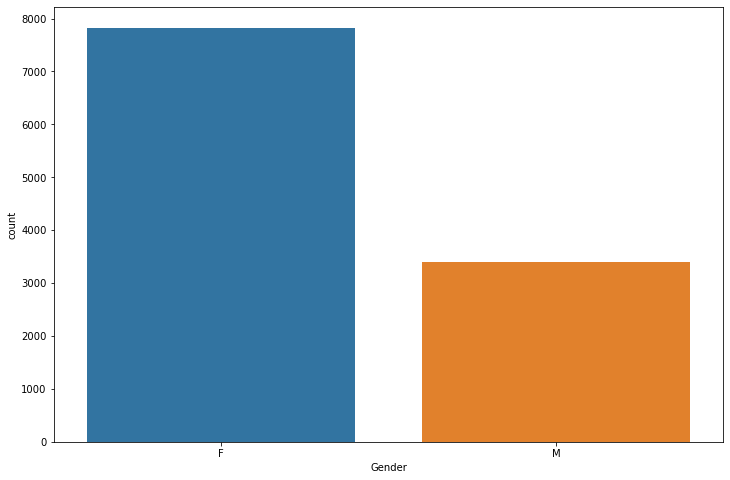

In [21]:
plt.figure(figsize=(12,8))
ax=sns.countplot(df['Gender'])



In [1]:
np.where(df['gender']=='F')

<IPython.core.display.Javascript object>

NameError: name 'df' is not defined

In [22]:
df["Gender"].value_counts()

F    7828
M    3403
Name: Gender, dtype: int64

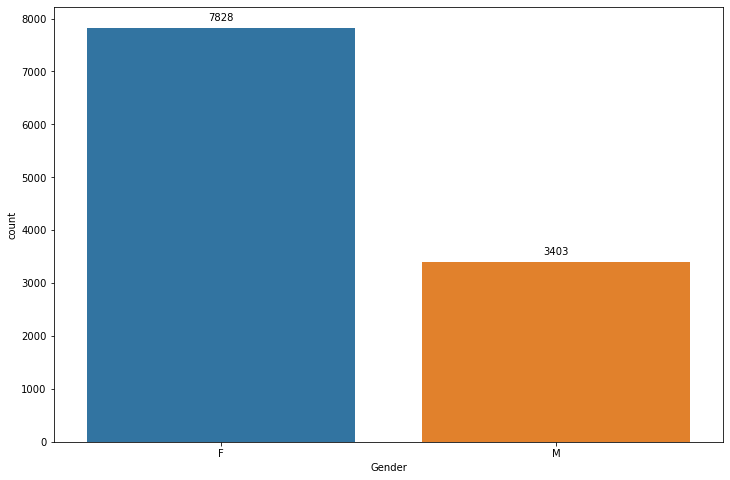

In [24]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df['Gender'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

In [25]:
# how much did the man or woman shopping spend?
sales=df.groupby(["Gender"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales

,Gender,Amount
0,F,74307679
1,M,31871146


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

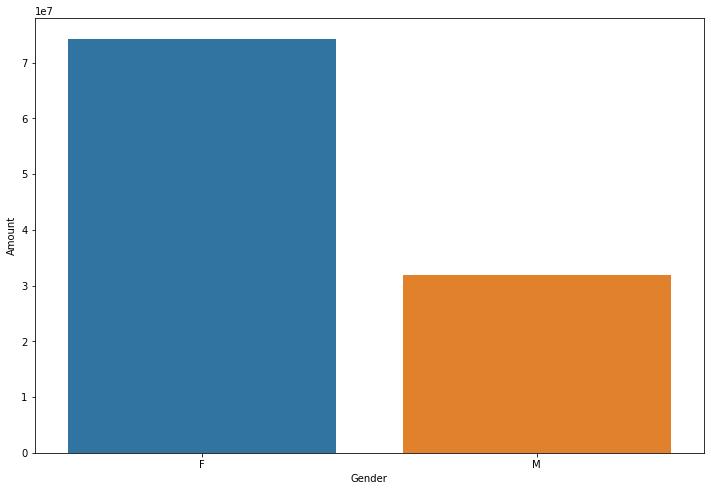

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(sales["Gender"],sales['Amount'])

**from above graph we can see that most of the files are females and even the purchasing power of females are greater than men.**

### Age

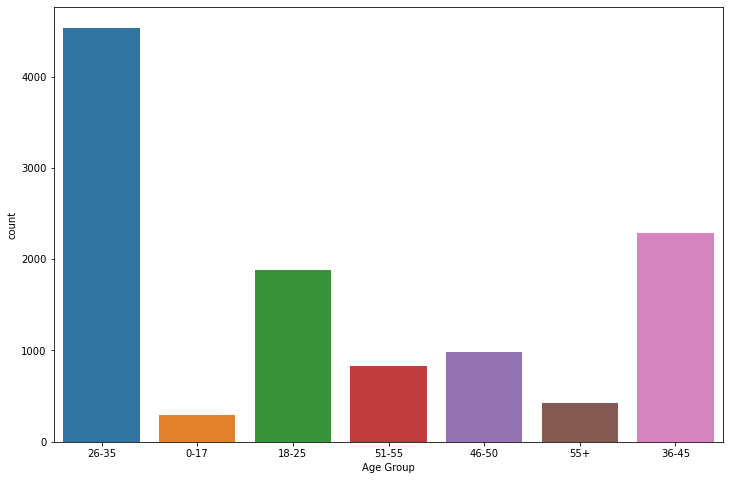

In [31]:
plt.figure(figsize=(12,8))
ax = sns.countplot(df['Age Group'])

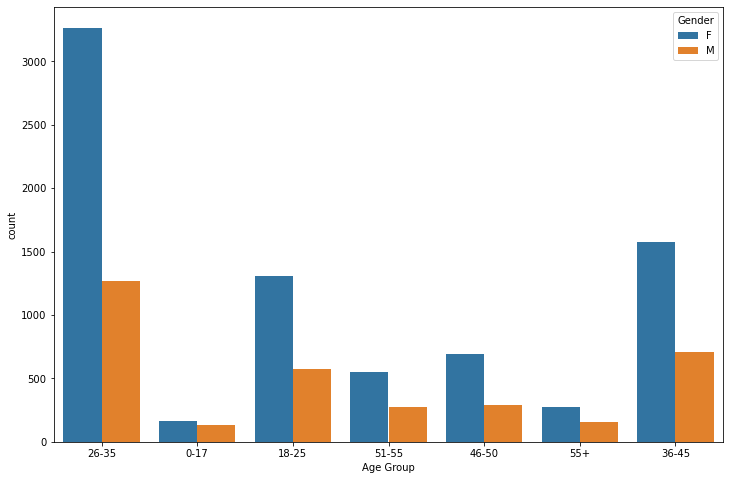

In [32]:
ax = plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Age Group', hue='Gender', data=df)


In [33]:
sales_Age=df.groupby(["Age Group"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_Age

,Age Group,Amount
2,26-35,42581767
3,36-45,22135135
1,18-25,17235530
4,46-50,9207844
5,51-55,8237909
6,55+,4080987
0,0-17,2699653


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

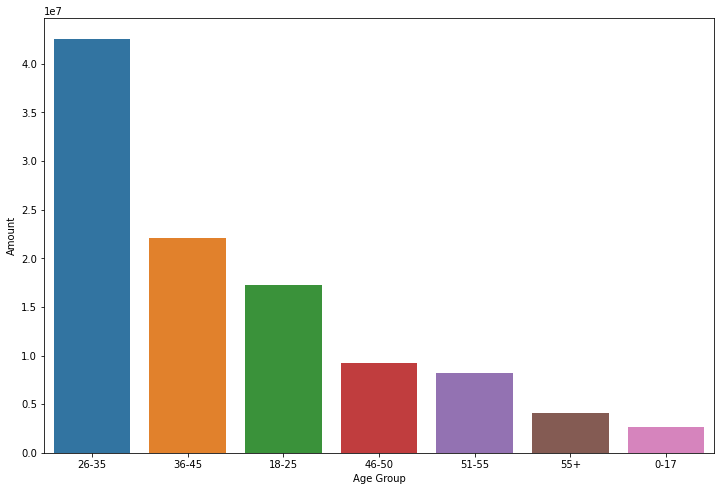

In [30]:
ax = plt.figure(figsize=(12, 8))

sns.barplot(x='Age Group',y='Amount',data=sales_Age)

### state

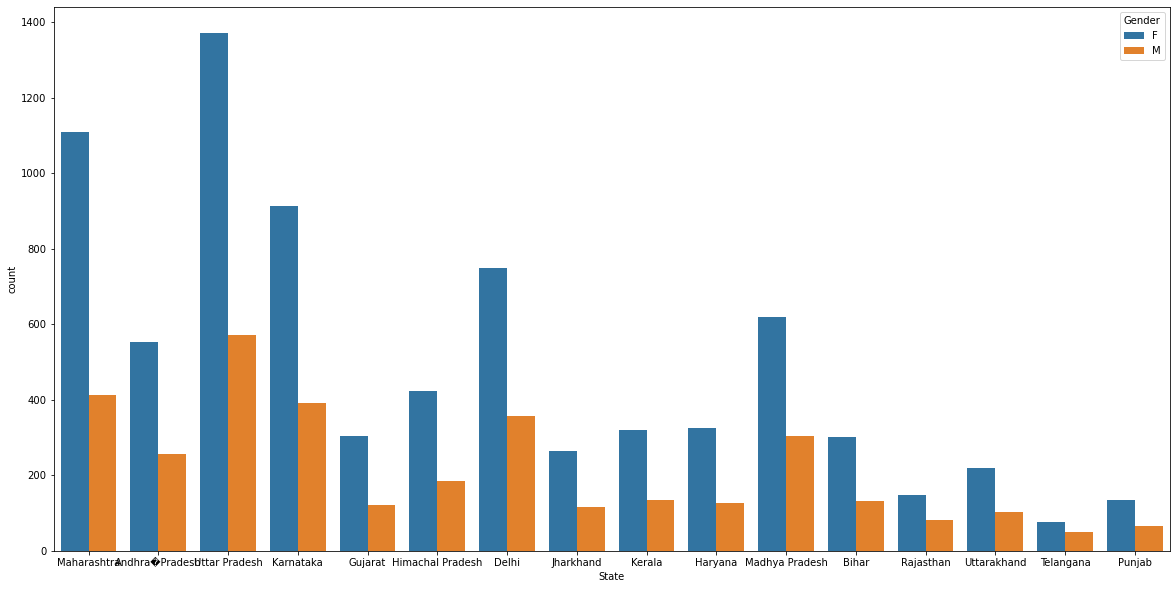

In [34]:
ax = plt.figure(figsize=(20, 10))
ax = sns.countplot(x='State', hue="Gender",data=df)

In [35]:
sales_state=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sales_state

,State,Orders
14,Uttar Pradesh,4803
10,Maharashtra,3798
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra�Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1106
3,Gujarat,1063


<AxesSubplot:xlabel='State', ylabel='Orders'>

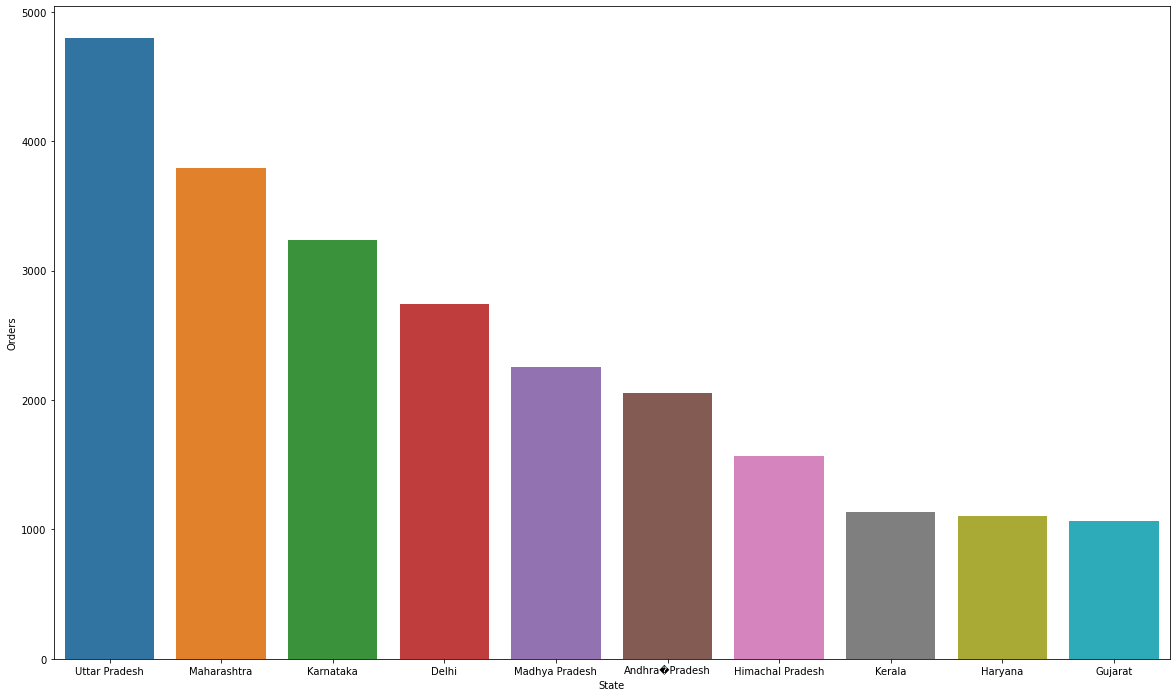

In [36]:
 plt.figure(figsize=(20, 12))
sns.barplot(x='State',y='Orders',data=sales_state,)

<AxesSubplot:xlabel='State', ylabel='Amount'>

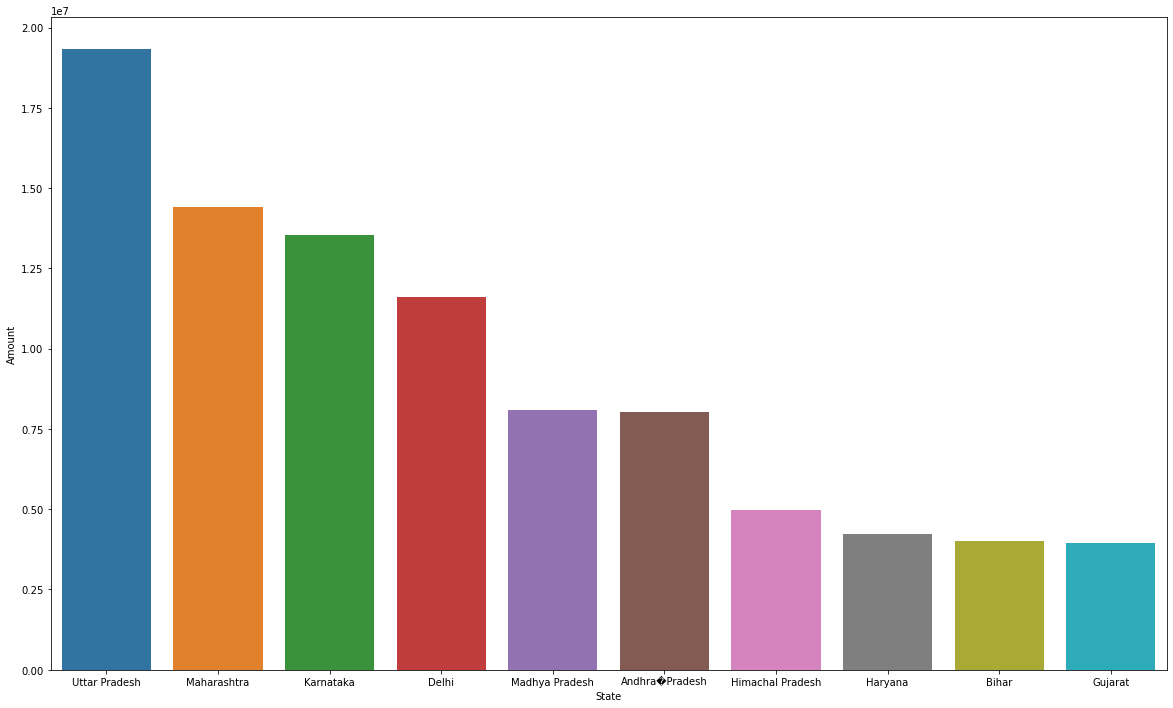

In [37]:
sales_state_Amount=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sales_state_Amount
plt.figure(figsize=(20, 12))
sns.barplot(x='State',y='Amount',data=sales_state_Amount)

#### From the above graph, we can see that the majority of orders and total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

### Marital Status

In [38]:
df.groupby("Gender")['Marital_Status'].value_counts()

Gender  Marital_Status
F       no                4572
        yes               3256
M       no                1942
        yes               1461
Name: Marital_Status, dtype: int64

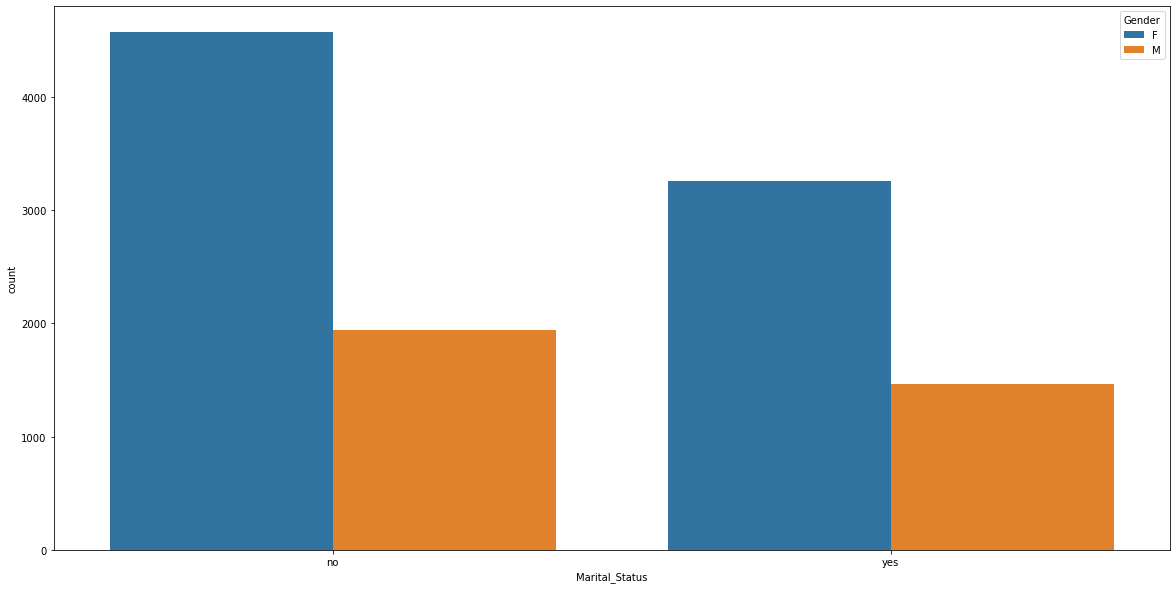

In [39]:
ax = plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Marital_Status', hue="Gender",data=df)

#### From the above graph, we can see that mosrt of the buyers are unmarrid(Women) and they have high purchasing power

### Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

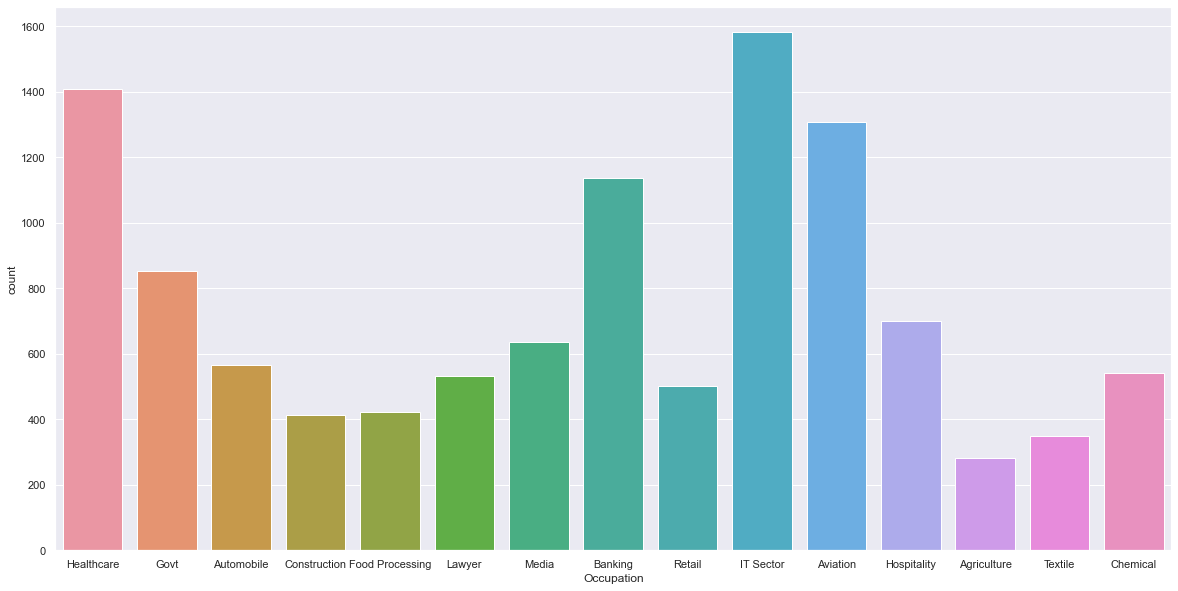

In [40]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(df['Occupation'])

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

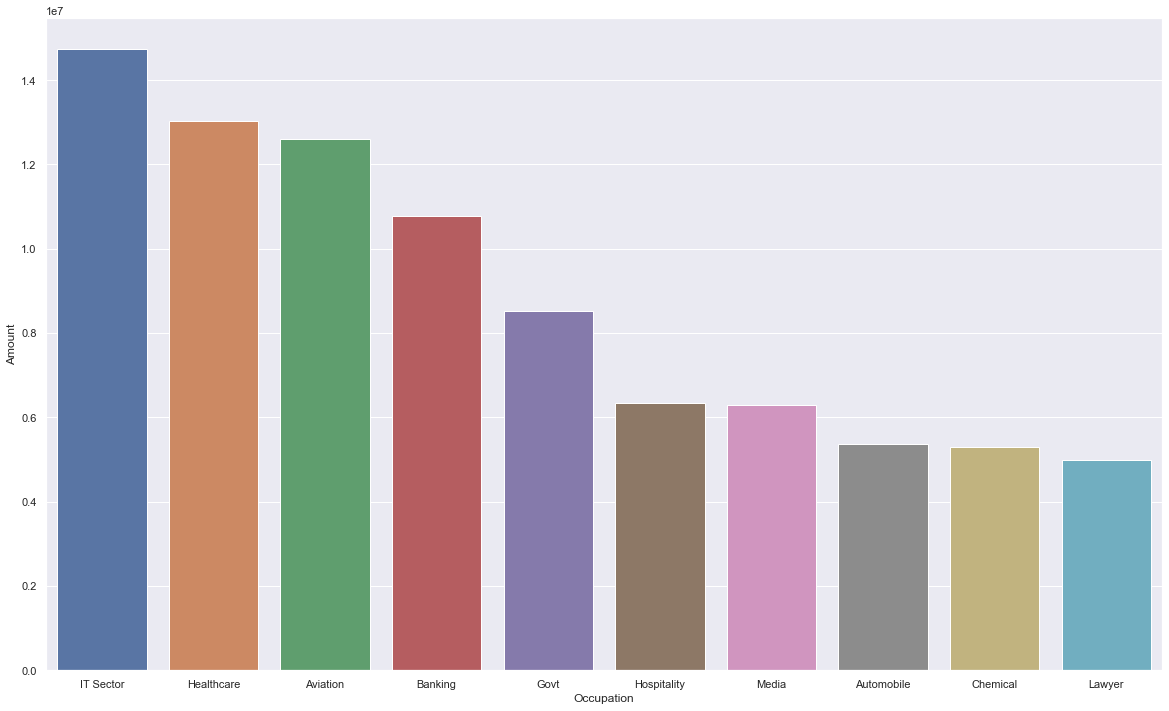

In [41]:
sales_Occ=df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sales_Occ
plt.figure(figsize=(20, 12))
sns.barplot(x='Occupation',y='Amount',data=sales_Occ)

#### From the above graph, we can see that most of the buyers are working in IT sector and Healthcare. 

## Product_Category

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

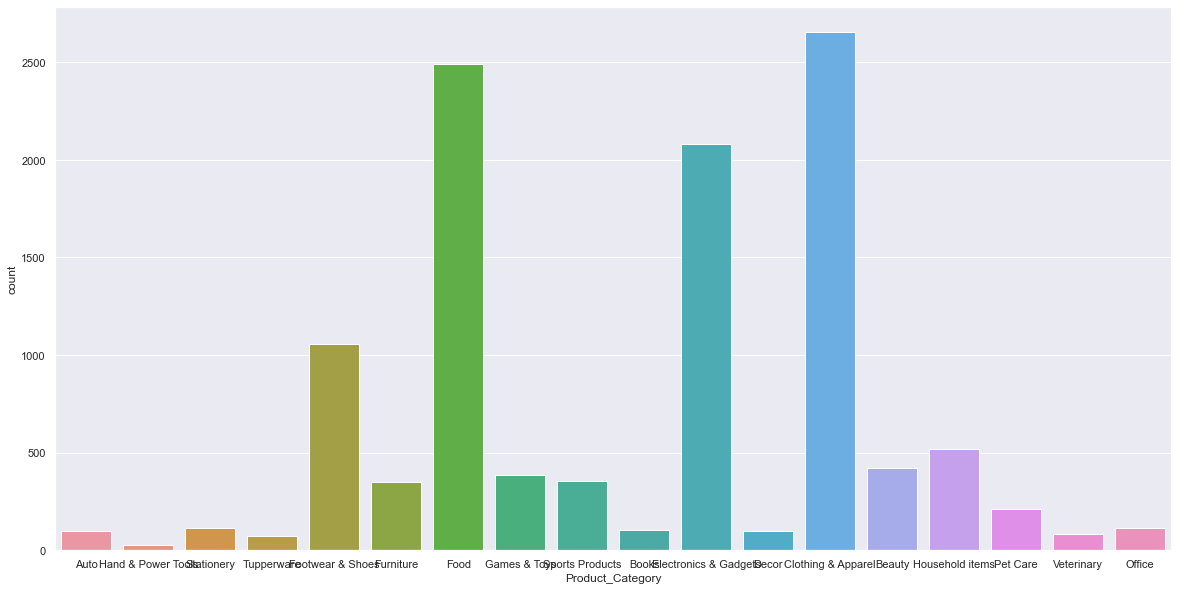

In [42]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(df['Product_Category'])

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

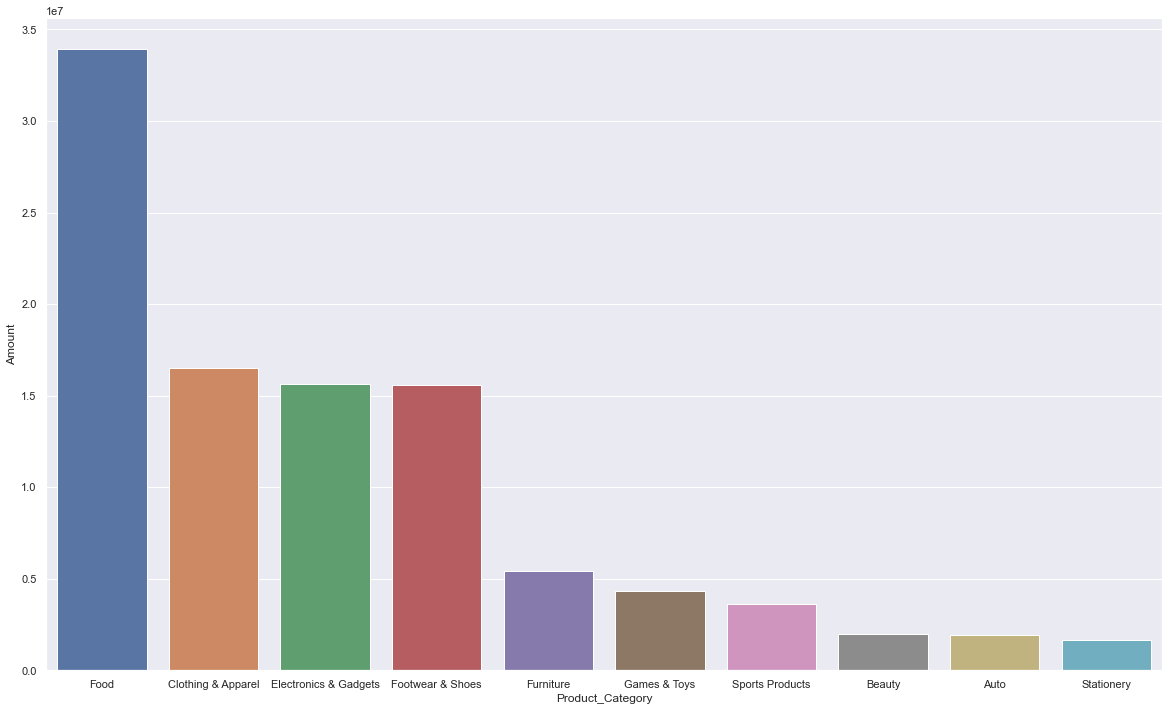

In [43]:
sales_Product=df.groupby(["Product_Category"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sales_Product
plt.figure(figsize=(20, 12))
sns.barplot(x='Product_Category',y='Amount',data=sales_Product)

#### From the above graph, we can see that most of the sold product are from food, Clothing and Electronic Category. 

<AxesSubplot:xlabel='Product_Category', ylabel='Orders'>

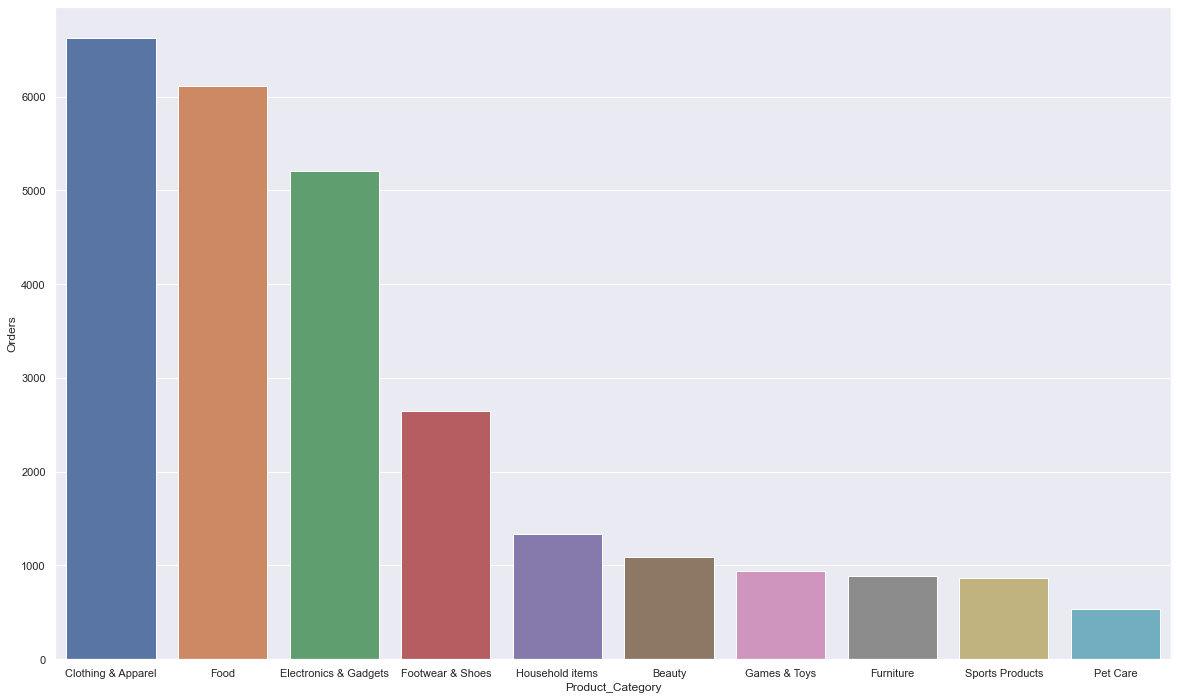

In [44]:
sales_Product_Orders=df.groupby(["Product_Category"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sales_Product_Orders
plt.figure(figsize=(20, 12))
sns.barplot(x='Product_Category',y='Orders',data=sales_Product_Orders)

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

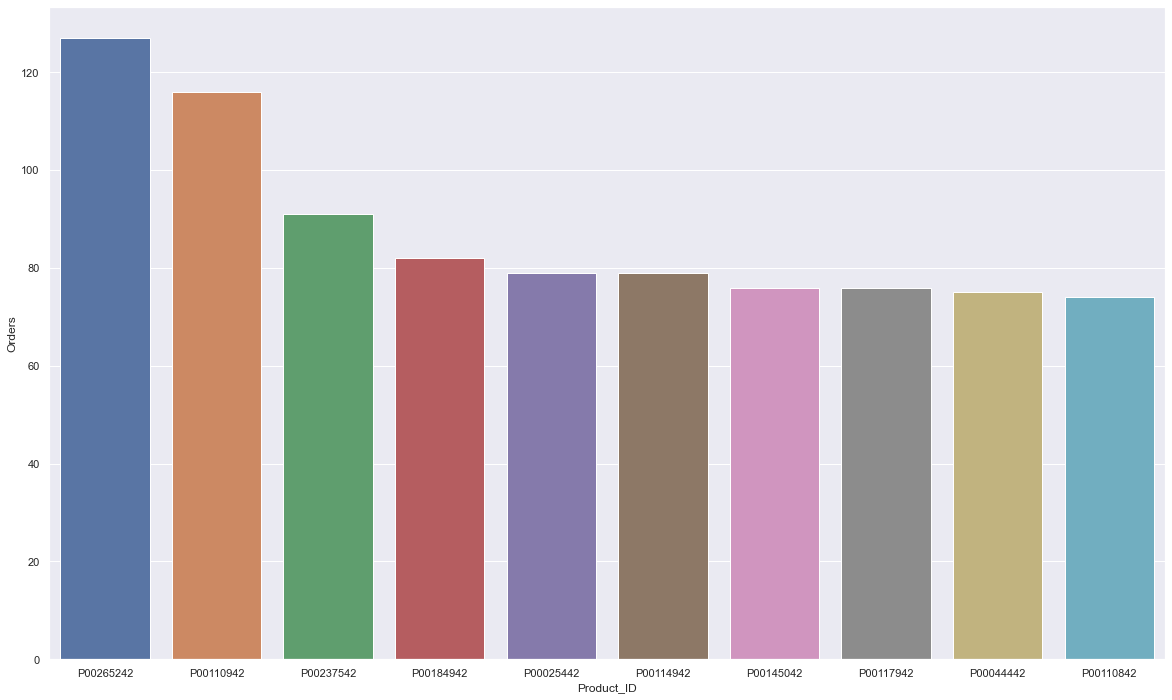

In [45]:
sales_ProductID_Orders=df.groupby(["Product_ID"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sales_ProductID_Orders
plt.figure(figsize=(20, 12))
sns.barplot(x='Product_ID',y='Orders',data=sales_ProductID_Orders)

# Conclusion:

### married women age group 26-35 yrs from UP, Maharashtra and Karnataka Working in IT, Healthcare and Aviation are more likely to buy products from Food Clothing and Electronics category.